We want to model a probabilistic system describing the variables:
- "Burglary": There has been an burglary at your home, while you are away.
- "Earthquake": There has been an earthquake in the area.
- "Alarm": The alarm system of your home was triggered.
- "Neighbor": The neighbor calls.

Tasks:
- Model suitable logical sentences connecting these variables.
- Calculate the probability of a burglary at your home based on evidence on the other variables.


# Build a Propositional Knowledge Base

In [2]:
# represent our logic by logical sentences (implications and equations)
sen1 = ["imp", "Burglary", "Alarm"]
sen2 = ["imp", "Earthquake", "Alarm"] #Burglary and Earthquake will imply that the Alarm is triggered
sen12b = ["imp", "Alarm",["or","Burglary","Earthquake"]] #Triggered Alarm will imply either Burglary or Earthquake
sen3 = ["imp", "Alarm", "Neighbor"] #Triggered Alarm will imply Neighbor calls

In [3]:
# Place a dictionary of the logical sentences here (the keys can be arbitrary).
from tnreason import knowledge
knowledgeBase = knowledge.HybridKnowledgeBase(
    facts = {"s1": sen1, "s2": sen2, "s12b": sen12b, "s3": sen3} 
)

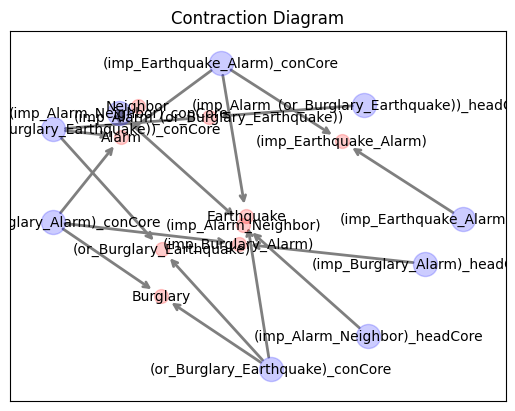

In [4]:
from tnreason import engine

cores = knowledgeBase.create_cores()


engine.draw_contractionDiagram(cores)


# Infer the Model

In [6]:
inferer = knowledge.InferenceProvider(knowledgeBase)

In [8]:
inferer.ask_constraint(["Alarm"])

'contingent'

In [10]:
# The 'contingent' state means that it depends on other parameters 

In [7]:
inferer.ask(["Burglary"], evidenceDict={"Alarm": True}) 

0.6666666666666666

In [11]:
inferer.ask(["Alarm"], evidenceDict={"Burglary": True}) 

1.0

In [ ]:
# We see that the Alarm will sound for sure if we have a Burglary on hand,
# but if the Alarm sounds, we cannot be sure that the issue is a Burglary (might be Earthquake).

## Graphical decompositions of the sentences

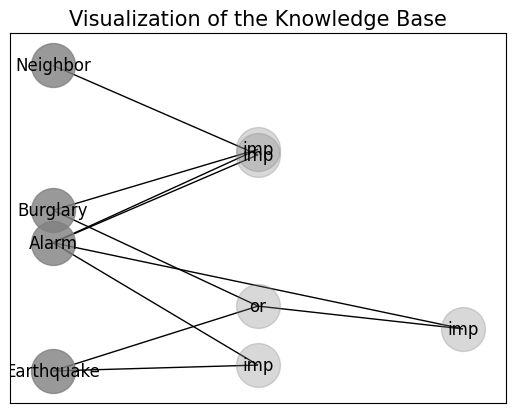

In [12]:
knowledge.visualize(knowledgeBase)